In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

<b> 1. </b> 


P (sevens) is a lot more likely because it can be a result of many permutations whereas snake eyes is just one case out of a total of 36. 
P(snake eyes): = (1/6).(1/6) = 1/36 <br>
> P (Seven): OR case 

| Dice 1 | Dice 2 | 
| --- | --- | 
| 1 | 6 | 
| 2 | 5 | 
| 3 | 4 | 
| 4 | 3 | 
| 5 | 2 | 
| 6 | 1 | 

> <b> Ratio </b> = P(snake)/ P(seven) = 1/6

<b> 2. </b> <br>
The outcomes of a dice roll are randomly distributed, with each outcome having a probability of 1/6. Thus, the sum of n dice rolls is given by the convolution. 



Sum of 2 six sided dice. <br>
> <b> Method 1: Counting </b> <br>
min sum = 2 <br>
max sum= 12 <br>
Possible outcomes = 2,3,4,5,6,7,8,9,10,11,12

| Dice 1 | Dice 2 | Sum | 
| --- | --- | --- | 
| 1 | 1 | 2 | 
| 1 | 2 | 3 |
| 2 | 1 | 3 |
| 2 | 2 | 4 |
| 1 | 3 | 4 |
| 3 | 1 | 4 |
| 1 | 4 | 5 |
| 2 | 3 | 5 |
| 3 | 2 | 5 |
| 4 | 1 | 5 |
| 1 | 5 | 6 |
| 2 | 4 | 6 |
| 3 | 3 | 6 |
| 4 | 2 | 6 |
| 5 | 1 | 6 |
| 1 | 6 | 7 |
| 2 | 5 | 7 |
| 3 | 4 | 7 |
| 4 | 3 | 7 |
| 5 | 2 | 7 |
| 6 | 1 | 7 |
| 2 | 6 | 8 |
| 3 | 5 | 8 |
| 4 | 4 | 8 |
| 5 | 3 | 8 |
| 6 | 2 | 8 |
| 3 | 6 | 9 |
| 4 | 5 | 9 |
| 5 | 4 | 9 |
| 6 | 3 | 9 |

We see a pattern in the probabilities and can infer the rest of the values. <br>
Here are the probabilities of the sum: <br>
P(2) = 1/36 ; P(3) = 2/36 ; P(4) = 3/36 ; P(5) = 4/36 ; P(6) = 5/36 ; <br>
P(7) = 6/36 ; P(8) = 5/36 ; P(9) = 4/36 ; P(10)= 3/36 ; P(11)= 2/36 ; P(12) = 1/36

In [4]:
outputs=[2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12]
y=outputs

> <b> Method 2 : Convolution </b>

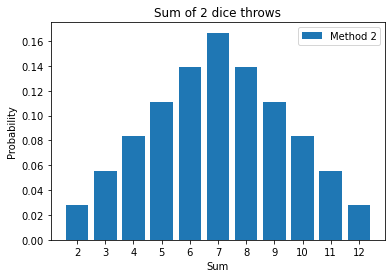

In [5]:
P=[1/6]*6
distribution=np.convolve(P,P)
x=np.arange(2,13,1)
plt.xticks(x)
plt.bar(x,distribution,label="Method 2")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.title("Sum of 2 dice throws")
plt.legend()

<b> 3. </b>

In [6]:
sums=[2,3,4,5,6,7,8,9,10,11,12] #Possible sums of dice roll
frequency=distribution*36       # Frequency of each sum
output=[]

for i in range(len(frequency)):  # Checking if we get the same outputs as the list y 
    lst= int(frequency[i])*[sums[i]]
    for j in lst: 
        output.append(j)
print ("Method 2:\n",output,"\n\nMethod 1:\n",y)

Method 2:
 [2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12] 

Method 1:
 [2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12]


Both methods produce the same observation.

Variance is given by:
$$ S^2 =  \frac{\sum (x_i - \bar{x})^2}{n - 1} $$

In [7]:
mean=np.mean(output)
variance=np.var(output)
print (f'Mean    : {mean}\nVariance: {variance}')

Mean    : 7.0
Variance: 5.833333333333333


Variance can be a float since we're diving by n-1. 

<b> 4. Average of 10 dice rolls. </b>  

In [24]:
p=P
conv_1=distribution
conv_2=np.convolve(conv_1,p)
conv_3=np.convolve(conv_2,p)
conv_4=np.convolve(conv_3,p)
conv_5=np.convolve(conv_4,p)
conv_6=np.convolve(conv_5,p)
conv_7=np.convolve(conv_6,p)
conv_8=np.convolve(conv_7,p)
conv_9=np.convolve(conv_8,p)

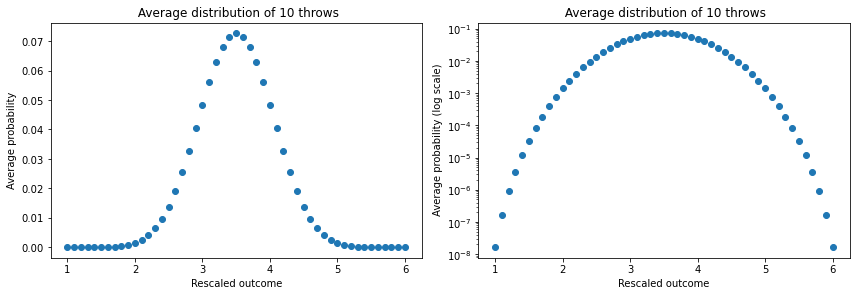

In [11]:
fig,(ax,ax1)=plt.subplots(1,2,figsize=(12,4))
n=10
x=np.linspace(n,n*6,n*5+1)/n   #rescaling 
ax.plot(x,conv_9,"o",ms=6)
ax1.plot(x,conv_9,"o",ms=6)
ax1.set_yscale("log")
ax.set_ylabel("Average probability")
ax1.set_ylabel(" Average probability (log scale)")
ax.set_xlabel("Rescaled outcome")
ax1.set_xlabel("Rescaled outcome")
plt.tight_layout()
ax.set_title(" Average distribution of 10 throws")
ax1.set_title(" Average distribution of 10 throws")
print ()

<b> No, </b> This is not a gaussian. It looks like one because of Central Limit Theorem which states that when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed. <br> 
N=10 is large enough to  make it look gaussian. <br>
Though the distribution now has floating values, it is still not continuous. <br>
Also, the distribution doesn't extend to infinity. 

<b>5. Sum of Gaussian </b>


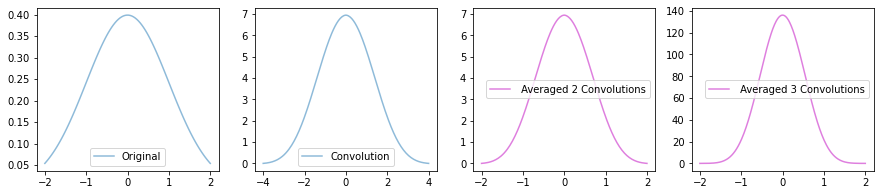

In [93]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(15,3))
d = np.linspace(-2,2,100)
p=stats.norm.pdf(d)
h=ax1.plot(d,p, alpha=0.5,label="Original")  #Probability distribution to be convolved

n=2
d = np.linspace(-4,4,199)
c2=np.convolve(p,p)
h=ax2.plot(d,c2,alpha=0.5,label="Convolution")  # Convolved Probability Distribution


ax2.legend()
ax1.legend()

#Averaging the convolution
n=2
d = np.linspace(-4,4,199)/n
c2=np.convolve(p,p)
h=ax3.plot(d,c2,alpha=0.5,label=" Averaged 2 Convolutions",c="m")  # Convolved Probability Distribution

n=3
d = np.linspace(-6,6,298)/n
c3=np.convolve(c2,p)
h=ax4.plot(d,c3,alpha=0.5,label=" Averaged 3 Convolutions",c="m")  # Convolved Probability Distribution


ax3.legend()
ax4.legend()


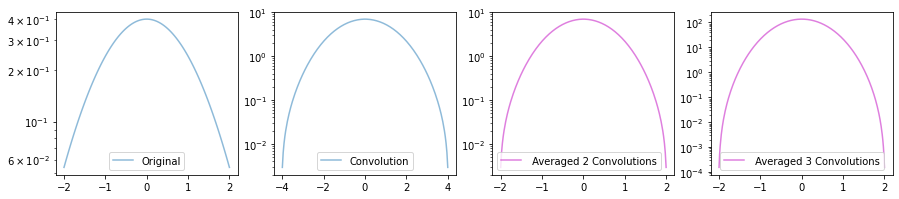

In [95]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(15,3))
d = np.linspace(-2,2,100)
p=stats.norm.pdf(d)
h=ax1.plot(d,p, alpha=0.5,label="Original")  #Probability distribution to be convolved
ax1.set_yscale("log")

n=2
d = np.linspace(-4,4,199)
c2=np.convolve(p,p)
h=ax2.plot(d,c2,alpha=0.5,label="Convolution")  # Convolved Probability Distribution
ax2.set_yscale("log")

ax2.legend()
ax1.legend()

#Averaging the convolution
n=2
d = np.linspace(-4,4,199)/n
c2=np.convolve(p,p)
h=ax3.plot(d,c2,alpha=0.5,label=" Averaged 2 Convolutions",c="m")  # Convolved Probability Distribution
ax3.set_yscale("log")

n=3
d = np.linspace(-6,6,298)/n
c3=np.convolve(c2,p)
h=ax4.plot(d,c3,alpha=0.5,label=" Averaged 3 Convolutions",c="m")  # Convolved Probability Distribution
ax4.set_yscale("log")


ax3.legend()
ax4.legend()


From the log graph, we can deduce that the sum on Gaussians is also Gaussian (as it is a perfect parabola). 
As the number of convolutions increase, the Gaussian gets taller and slimmer. The standard deviation of the average of convoluted Gaussian decreases. Thus, the time integral of a signal get smoother the longer we take data for. This makes sense as the signal would stand out more. 